<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62839 entries, 0 to 62838
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      62839 non-null  object 
 1   type                                    62839 non-null  object 
 2   action                                  62839 non-null  object 
 3   event_time                              62839 non-null  object 
 4   ed_app                                  0 non-null      float64
 5   course_offering_id                      0 non-null      float64
 6   session_id                              62839 non-null  object 
 7   statement_type                          0 non-null      float64
 8   statement_version                       0 non-null      float64
 9   object_id                               62839 non-null  object 
 10  membership_role                         62839 non-null  ob

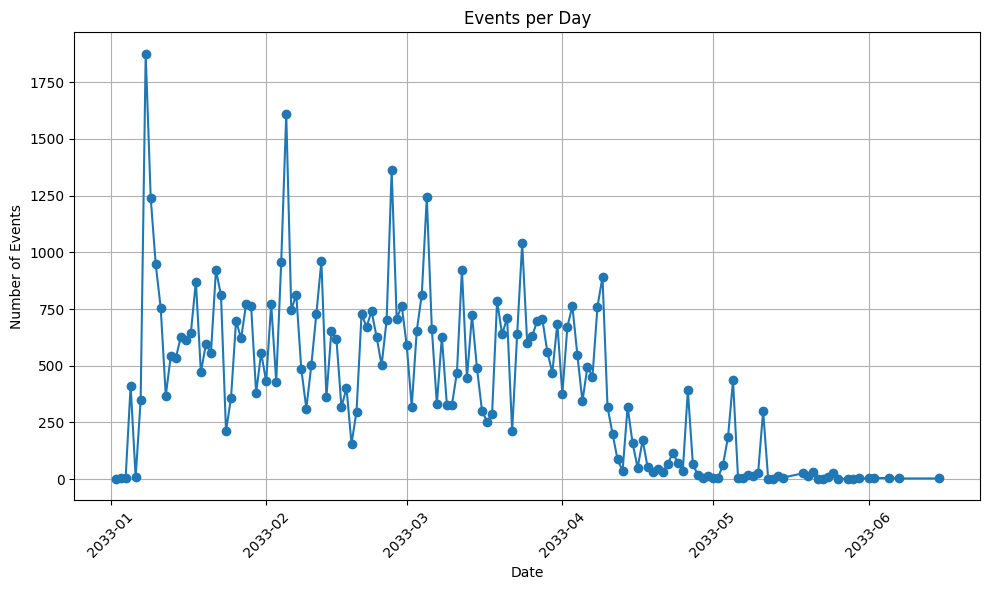

In [149]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import linregress

# Load the CSV file into a DataFrame
df = pd.read_csv('./data/events.csv', encoding= 'latin')

# Display the first few rows of the DataFrame
df.head()

# Get basic information about the DataFrame
df_info = df.info()

# Summary statistics of the data
summary_statistics = df.describe()

# Visualize the data
df['event_time'] = pd.to_datetime(df['event_time'], format=
                                  "mixed")

# Group the events by day and count the number of events per day
daily_events = df['event_time'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_events.index, daily_events.values, marker='o', linestyle='-')
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
 
# Display the graph
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Do Students Who Participate More Receive Better Scores?')

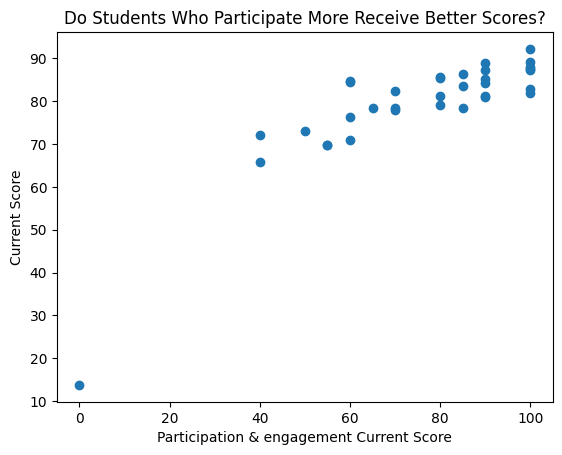

In [150]:
assignments = pd.read_csv('./data/hackathon_alternate_data/additional/assignments.csv', encoding= 'latin')
gradebook = pd.read_csv('./data/hackathon_alternate_data/additional/gradebook.csv', encoding= 'latin')
enrollments = pd.read_csv('./data/hackathon_alternate_data/additional/enrollments.csv', encoding= 'latin')
discussions = pd.read_csv('./data/hackathon_alternate_data/additional/discussions.csv', encoding= 'latin')
gradebook = gradebook.fillna(0)
gradebook = gradebook.drop([0,1])

plt.scatter(gradebook["Participation & engagement Current Score"].astype(int), gradebook["Current Score"].astype(float))
plt.xlabel("Participation & engagement Current Score")
plt.ylabel("Current Score")
plt.title("Do Students Who Participate More Receive Better Scores?")

Text(0.5, 1.0, 'Do Students Who Participate More Receive Better Scores? (Outlier Removed) Correlation Coefficient: 0.8150999615215863')

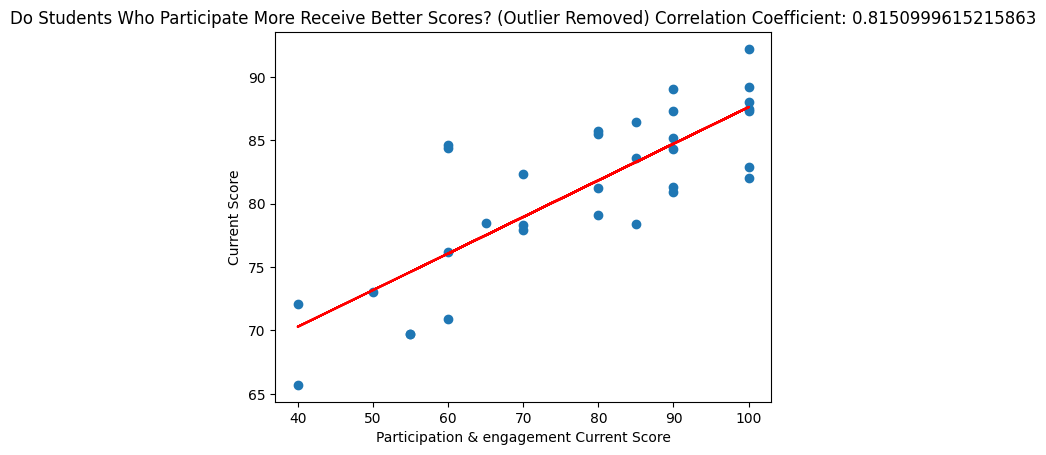

In [151]:
assignments = pd.read_csv('./data/hackathon_alternate_data/additional/assignments.csv', encoding= 'latin')
gradebook = pd.read_csv('./data/hackathon_alternate_data/additional/gradebook.csv', encoding= 'latin')
enrollments = pd.read_csv('./data/hackathon_alternate_data/additional/enrollments.csv', encoding= 'latin')
gradebook = gradebook.fillna(0)
gradebook = gradebook.drop([0,1])
gradebook = gradebook.drop([29])

plt.scatter(gradebook["Participation & engagement Current Score"].astype(int), gradebook["Current Score"].astype(float))

slope, intercept, r_value, p_value, std_err = linregress(gradebook["Participation & engagement Current Score"].astype(int), gradebook["Current Score"].astype(float))
regression_line = slope * gradebook["Participation & engagement Current Score"].astype(int) + intercept
plt.plot(gradebook["Participation & engagement Current Score"].astype(int), regression_line, color='red', label="Linear Regression Line")

plt.xlabel("Participation & engagement Current Score")
plt.ylabel("Current Score")
plt.title("Do Students Who Participate More Receive Better Scores? (Outlier Removed) Correlation Coefficient: " + str(r_value))


Text(0.5, 1.0, 'Do More Active Students On Canvas Receive Better Scores?')

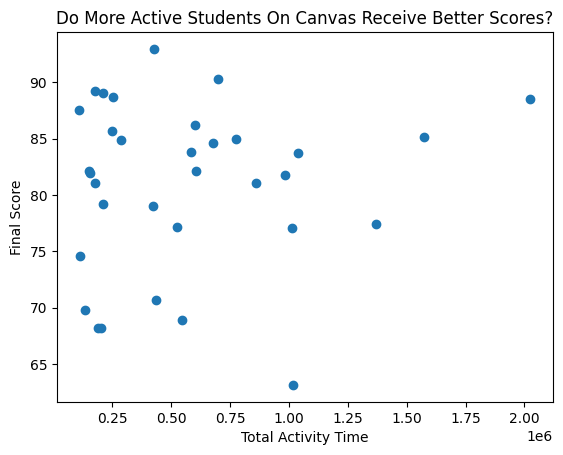

In [152]:
gradebook['Student'] = gradebook['Student'].str[8:].astype(int)
gradebook = gradebook.sort_values(by = 'Student')
gradebook = gradebook.reset_index()
enrollments['user_id'] = enrollments['user_id'].str[8:].astype(int)
enrollments = enrollments.sort_values(by = 'user_id')
enrollments = enrollments.reset_index()
gradebook = gradebook.assign(total_activity_time = enrollments["total_activity_time"])
gradebook = gradebook.fillna(0)
gradebook = gradebook.apply(lambda x: pd.to_numeric(x, errors= 'coerce'))
gradebook['Final Score'] = (((gradebook['Current Score'] / 100) * 90) + gradebook['Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)'])

plt.scatter(gradebook["total_activity_time"].astype(int), gradebook["Final Score"].astype(float))
plt.xlabel("Total Activity Time")
plt.ylabel("Final Score")
plt.title("Do More Active Students On Canvas Receive Better Scores?")

Text(0.5, 1.0, 'Do More Active Students On Canvas Receive Better Scores? (Outliers Removed) Correlation Coefficient: 0.09269312337513318')

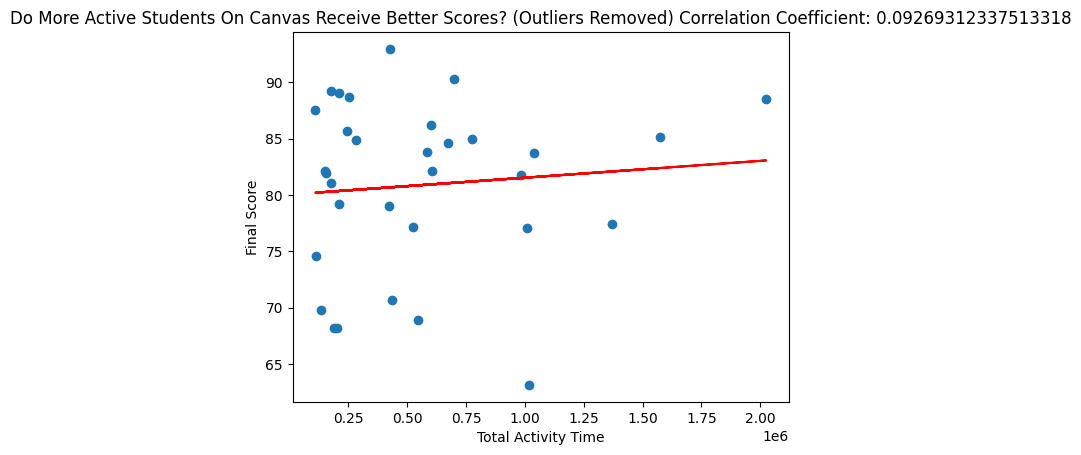

In [153]:
gradebook_without_outlier = gradebook.drop([32])
plt.scatter(gradebook_without_outlier["total_activity_time"], gradebook_without_outlier["Final Score"])
slope, intercept, r_value, p_value, std_err = linregress(gradebook_without_outlier["total_activity_time"], gradebook_without_outlier["Final Score"])
regression_line = slope * gradebook_without_outlier["total_activity_time"] + intercept
plt.plot(gradebook_without_outlier["total_activity_time"], regression_line, color='red', label="Linear Regression Line")
plt.xlabel("Total Activity Time")
plt.ylabel("Final Score")
plt.title("Do More Active Students On Canvas Receive Better Scores? (Outliers Removed) Correlation Coefficient: " + str(r_value))


In [154]:
df0 = pd.read_csv('./data/hackathon_alternate_data/additional/gradebook.csv', encoding= 'latin')
df0 = df0.fillna(0)
df0 = df0.drop([0,1])

discussions = pd.read_csv("./data/hackathon_alternate_data/additional/discussions.csv", encoding='latin')
discussions.dtypes
people = discussions.groupby("actor_id").post_message_length.sum().reset_index()
ppl = people.sort_values('post_message_length', ascending = False)

df0 = df0.drop(['Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)',
                'Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)',
                'Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)',
                'Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc)',
                'Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99)', 
                'Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e)'], 
                axis= 'columns')
df0['Student'] = df0['Student'].str[8:].astype(int)
df0 = df0.sort_values(by = 'Student')
df0 = df0.apply(lambda x: x.fillna(df0.index.value_counts().idxmax()))
df0 = df0.apply(lambda x: pd.to_numeric(x, errors= 'coerce'))
df0['Final_Score'] = (((df0['Current Score'].astype(float) / 100) * 90) + df0['Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)'].astype(float))
ppl = ppl.drop([0])
ppl['actor_id'] = ppl['actor_id'].str[8:].astype(int)
ppl = ppl.sort_values(by = 'actor_id')

ppl = ppl.drop([41, 15, 21, 26, 32, 33, 35, 36])

df0 = df0.drop([29])


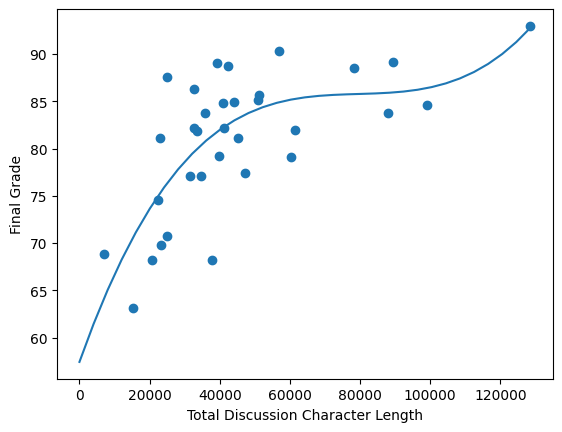

85.95498384499591

In [155]:
model = np.poly1d(np.polyfit(ppl["post_message_length"], df0['Final_Score'], 3))
line = np.linspace(0, max(ppl["post_message_length"]), 
                   len(ppl["post_message_length"]))
                   

plt.scatter(ppl["post_message_length"], df0['Final_Score'])
plt.plot(line, model(line))
plt.xlabel("Total Discussion Character Length")
plt.ylabel("Final Grade")
plt.show()

model(90000)
